In [9]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier


sns.set(rc={'figure.figsize':(10, 8)})

In [3]:
df_ForestImputer = pd.read_csv('../Train_music_ForestImputer.csv')
df_ForestImputer

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4.810120e+10,0.0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,4.810425e+10,0.0,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,4.811813e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,4.810105e+10,0.0,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,4.830019e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.894477e+09,1.0,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,4.875985e+09,0.0,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,4.811248e+09,0.0,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,4.896164e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [4]:
X = df_ForestImputer.drop(['target'], axis=1)
y = df_ForestImputer.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

0.575550766283525

In [27]:
print("ROC_AUC (MAIN)", roc_auc_score(y_test, y_pred))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

ROC_AUC (MAIN) 0.575550766283525
Accuracy 0.878
Recall 0.2222222222222222
Precision 0.1951219512195122


In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
tree = DecisionTreeClassifier()

In [32]:
scores = cross_val_score(tree, X, y, cv=kf, scoring='roc_auc')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [0.55871348 0.56767797 0.56098124 0.58971793 0.56607439]
Средняя метрика на кросс-валидации: 0.5686330036291988


In [35]:
tree = DecisionTreeClassifier()
max_depth = np.arange(2, 11)
min_samples_split = np.arange(2,21)
min_samples_leaf = np.arange(2,11)
max_features = ["sqrt", "log2", "None"]

tree_params={'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features}

tree_grid = GridSearchCV(tree, tree_params, cv=kf, scoring='roc_auc', n_jobs = -1)
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='roc_auc')

In [36]:
print("Найлучшее качество модели при", tree_grid.best_params_)
print("Наилучшая оценка качества модели:", tree_grid.best_score_)

Найлучшее качество модели при {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 19}
Наилучшая оценка качества модели: 0.6981740042177453


In [68]:
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
#
#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
#
#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)
#
#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
#
#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')
#
# # Calling Method
# plot_grid_search(tree_grid.cv_results_, max_depth, max_features, 'Max deapth', 'Max Features')

ValueError: cannot reshape array of size 4617 into shape (3,9)

In [69]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_split = 5, min_samples_leaf = 20, max_features = 19)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file='tree.dot', feature_names=X.columns)
print(open('tree.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="data_type_2_m3 <= 905.294\ngini = 0.14\nsamples = 16000\nvalue = [14792, 1208]"] ;
1 [label="voice_all_out_dur_m1 <= 21117.429\ngini = 0.114\nsamples = 9979\nvalue = [9375, 604]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="data_type_1_m2 <= 253.139\ngini = 0.128\nsamples = 6802\nvalue = [6334, 468]"] ;
1 -> 2 ;
3 [label="content_count_m1 <= 102.5\ngini = 0.113\nsamples = 4693\nvalue = [4411, 282]"] ;
2 -> 3 ;
4 [label="gini = 0.103\nsamples = 4541\nvalue = [4294, 247]"] ;
3 -> 4 ;
5 [label="gini = 0.354\nsamples = 152\nvalue = [117, 35]"] ;
3 -> 5 ;
6 [label="lt <= 0.716\ngini = 0.161\nsamples = 2109\nvalue = [1923, 186]"] ;
2 -> 6 ;
7 [label="gini = 0.281\nsamples = 699\nvalue = [581, 118]"] ;
6 -> 7 ;
8 [label="gini = 0.092\nsamples = 1410\nvalue = [1342, 68]"] ;
6 -> 8 ;
9 [label="count_url_category_2 <= 974.0\ngini = 0.082\nsamples = 3177\nvalue = [3041, 13

Feature ranking:
1 short_out_calls_part_m2 0.16903129121320384
2 sim_count 0.16150112426494123
3 income_brnd_cont_m3 0.13125296757669472
4 sms_roam_out_count_m1 0.10043536010157726
5 sms_roam_out_count_m2 0.08874182209896092
6 voice_onnet_out_dur_m3 0.071760223861239
7 service_P_flag_m2 0.07135624780540603
8 voice_onnet_out_day_work_cost_m1 0.04800107470468737
9 vol_app_5 0.0418903829764721
10 is_obl_center 0.03298037374359741


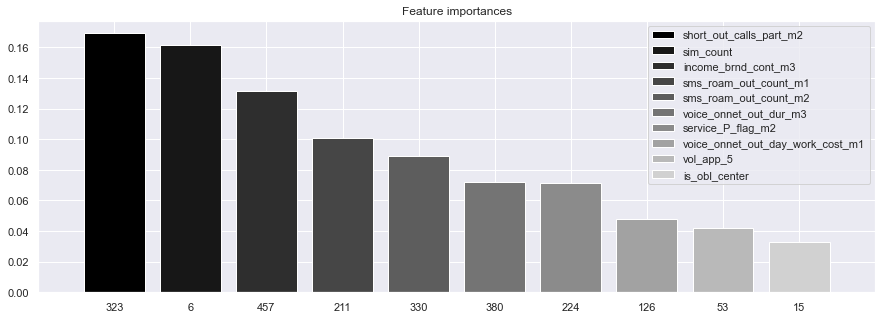

In [70]:
features = {'f' + str(i + 1):name for (i, name) in zip(range(len(df_ForestImputer.columns)), df_ForestImputer.columns)}
importances = tree.feature_importances_

indices = np.argsort(importances)[:: -1]
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

print("Feature ranking:")
for f in range(num_to_plot):
    print(f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot),
               importances[indices[:num_to_plot]],
               color=([str(i / float(num_to_plot +  1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot),
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f" + str(i)]) for i in feature_indices]);

In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [73]:
print("ROC_AUC (MAIN)", roc_auc_score(y_test, y_pred))
print("Accuracy", accuracy_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

ROC_AUC (MAIN) 0.5016014128352491
Accuracy 0.928
Recall 0.003472222222222222
Precision 0.5


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

max_depth = np.arange(2, 6)
min_samples_split = np.arange(10,21,2)
min_samples_leaf = np.arange(2, 6)
max_features = ["sqrt", "log2", "None"]
n_estimators = np.arange(100, 450, 50)
# rf_params={'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'n_estimators': n_estimators}

In [18]:
rf = RandomForestClassifier(random_state=42)
rf_params={'n_estimators': n_estimators, 'max_features': max_features}

rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='roc_auc', n_jobs = -1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400])},
             scoring='roc_auc')

In [19]:
print("Найлучшее качество модели при", rf_grid.best_params_)
print("Наилучшая оценка качества модели:", rf_grid.best_score_)

Найлучшее качество модели при {'max_features': 'sqrt', 'n_estimators': 400}
Наилучшая оценка качества модели: 0.7838206973693527


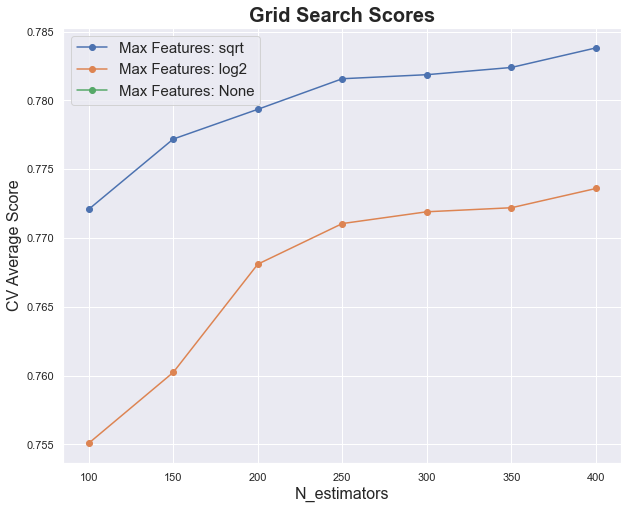

In [13]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method
plot_grid_search(rf_grid.cv_results_, n_estimators, max_features, 'N_estimators', 'Max Features')

In [7]:
rf = RandomForestClassifier(random_state=42, n_estimators = 400, max_features = "sqrt")
rf_params={'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rf_grid = GridSearchCV(rf, rf_params, cv=kf, scoring='roc_auc', n_jobs = -1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=400,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'min_samples_leaf': array([2, 3, 4, 5]),
                         'min_samples_split': array([10, 12, 14, 16, 18, 20])},
             scoring='roc_auc')

In [8]:
print("Найлучшее качество модели при", rf_grid.best_params_)
print("Наилучшая оценка качества модели:", rf_grid.best_score_)

Найлучшее качество модели при {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}
Наилучшая оценка качества модели: 0.7837353372971758


In [10]:
rf_model = RandomForestClassifier(random_state=42, n_estimators = 400, max_features = "sqrt", max_depth= 5, min_samples_leaf= 5, min_samples_split=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=400, random_state=42)

In [14]:
estimate = rf_model.estimators_[3]
export_graphviz(estimate, out_file='tree_from_rf.dot', feature_names = X.columns)

export_graphviz(estimate, out_file='tree_from_rf.dot', feature_names=X.columns)
print(open('tree_from_rf.dot').read())

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="all_cost_m1 <= 72.941\ngini = 0.138\nsamples = 10102\nvalue = [14804, 1196]"] ;
1 [label="content_count_m2 <= 90.5\ngini = 0.122\nsamples = 8167\nvalue = [12106, 845]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="voice_onnet_out_day_work_count_m3 <= 69.5\ngini = 0.109\nsamples = 7508\nvalue = [11246, 688]"] ;
1 -> 2 ;
3 [label="voice_onnet_out_count_m3 <= 158.0\ngini = 0.127\nsamples = 5375\nvalue = [7947, 583]"] ;
2 -> 3 ;
4 [label="voice_omo_out_night_rest_cost_m3 <= 0.392\ngini = 0.126\nsamples = 5365\nvalue = [7940, 577]"] ;
3 -> 4 ;
5 [label="gini = 0.116\nsamples = 4703\nvalue = [7024, 463]"] ;
4 -> 5 ;
6 [label="gini = 0.197\nsamples = 662\nvalue = [916, 114]"] ;
4 -> 6 ;
7 [label="content_count_m3 <= 42.5\ngini = 0.497\nsamples = 10\nvalue = [7, 6]"] ;
3 -> 7 ;
8 [label="gini = 0.278\nsamples = 5\nvalue = [5, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.408\nsampl

In [17]:
features = {'f' + str(i + 1):name for (i, name) in zip(range(len(df_ForestImputer.columns)), df_ForestImputer.columns)}
importances = estimate.feature_importances_

indices = np.argsort(importances)[:: -1]
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

print("Feature ranking:")
for f in range(num_to_plot):
    print(f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])

Feature ranking:
1 tp_flag 0.11294413430654428
2 sms_roam_in_count_m2 0.08284135323626318
3 id 0.06673058667673569
4 short_in_calls_part_m3 0.06509054708070434
5 block_count_m1 0.05800288371234681
6 short_out_calls_part_m1 0.05565188412685076
7 voice_onnet_out_day_rest_cost_m3 0.05533512812235287
8 service_8_count_m3 0.04186293393336145
9 count_act_type_6 0.034754874666096953
10 voice_onnet_in_count_m3 0.03232966574171372


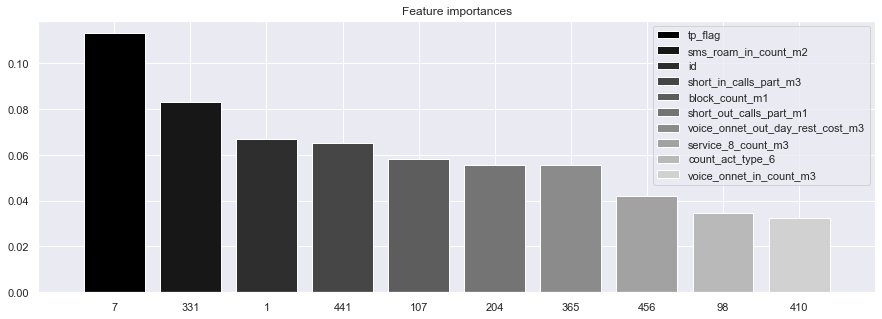

In [18]:
plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot),
               importances[indices[:num_to_plot]],
               color=([str(i / float(num_to_plot +  1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot),
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f" + str(i)]) for i in feature_indices]);